# 76 선형 회귀 모델
- 데이터를 선형 함수로 모델링
- 최소제곱법 : 평균제곱오차를 최소화하는 파라미터를 찾는다
    - 파라미터를 줄이고 키우고를 반복한다(예시)
    - 오차를 파라미터로 미분한 값만큼 조절을 반복한다(경사하강법)
    - 정규방정식으로 찾기(데이터가 많아지면 메모리 부족으로 사용 불가)
- 평균제곱오차 : 오차(예측과 정답의 차이)를 제곱 후 모든 샘플들의 오차를 평균

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

In [6]:
# 키와 몸무게, 몸무게로부터 키를 예측해보자
몸무게 = [30,60,70,90]
키 = [120,160,170,190]
몸무게_test = [65, 80] # 이 두사람의 키는 어떻게 될까? 

In [15]:
몸무게 = np.array(몸무게).reshape((-1,1))
키 = np.array(키)
몸무게_test = np.array(몸무게_test).reshape((-1,1))

In [20]:
# 76 모델 선택
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=몸무게, y=키) # w와 b를 조절하는것 , Y = w*x + b

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
몸무게_test, lr.predict(몸무게_test)

(array([[65],
        [80]]), array([162.93333333, 180.53333333]))

In [23]:
lr.score(몸무게, 키) # 결정계수 max 1

0.9928205128205129

In [25]:
# 계수 w와 절편 b,  Y = wx + b = 1,17*x + 86.6
lr.coef_, lr.intercept_


(array([1.17333333]), 86.66666666666667)

In [26]:
lr.coef_ * 몸무게 + lr.intercept_

array([[121.86666667],
       [157.06666667],
       [168.8       ],
       [192.26666667]])

In [27]:
키

array([120, 160, 170, 190])

## LinerRegression 으로 내일의 종가 예측
- 입력(X:하루 전 데이터), 출력(Y:다음 날의 종가)
- 데이터 총 m = 10, 학습용 8, 테스트 2
- 정규화는 생략
- 

In [110]:
url='https://finance.daum.net/domestic/kospi200'
url='코스피200 _ 다음 금융.html'#웹페이지를 다른 이름으로 저장
tables = pd.read_html(url, index_col=0)
len(tables)

3

In [111]:
df =tables[1]

In [112]:
#전일비와 등락률을 수치데이터로 변환
df['전일비'] = df['전일비'].replace('▼','-',regex=True)
df['전일비'] = df['전일비'].replace('▲','',regex=True)
df['등락률'] = df['등락률'].replace('%','',regex=True)
df['전일비'] = df['전일비'].astype(np.float) # 실수 변환
df['등락률'] = df['등락률'].astype(np.float)

In [131]:
# min max 정규화 [0,1]
minimum = np.min(df, axis=0)
maxmum = np.max(df, axis=0)
df_norm = (df - minimum) / (maxmum - minimum)
df_norm

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,0.647773,0.031250,0.030303,0.000000,0.000000,0.949879,0.304016,0.203663
19.07.01,0.805668,0.066964,0.066667,0.943871,1.000000,0.848631,0.575018,0.431188
19.06.28,0.898785,0.062500,0.060606,0.814038,0.774216,0.528986,1.000000,0.000000
19.06.27,1.000000,0.613839,0.606061,0.789162,0.964773,0.053341,0.710766,1.000000
19.06.26,0.101215,0.174107,0.169697,0.645383,0.677351,0.748390,0.296871,0.484462
19.06.25,0.000000,0.051339,0.048485,0.677808,0.676816,0.818438,0.326435,0.326582
19.06.24,0.121457,0.140625,0.139394,0.582397,0.517383,0.694847,0.000000,0.875416
19.06.21,0.080972,0.000000,0.000000,1.000000,0.932104,1.000000,0.308943,0.117092
19.06.20,0.295547,0.274554,0.266667,0.578497,0.590197,0.621578,0.151269,0.818812


In [115]:
# 입력X(하루전 데이터) 와 출력Y(다음날 데이터) 분리
X = df_norm.iloc[1:] # 오늘 데이터 제외
y = df_norm.iloc[:-1,0] # 가장 오래된 데이터와 종가 외의 컬럼 제외

X.shape, y.shape


((9, 8), (9,))

In [134]:
# Train / Test 용 분리
from sklearn.model_selection import train_test_split
offset = 2
X_train = X[offset:] #예전
X_test = X[:offset] # 최근
y_train = y[offset:] # 예전
y_test = y[:offset] # 최근

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [142]:
# train 셋으로 Liner Regression 모델
#78 릿지(ridge) 모델 : w를 가능한한 작게 만드는 LinearRegression
    # 규제(resularizaion) - Lasso : L1(abs), Ridge : L2(square)
    # 라쏘 : 몇가지 특징만 사용해서 Y를 예측하고 싶을 때
# w를 줄인다는것은 Y를 예측하는데 가능한한 모든 특성을 반영해라
# Y = w1*x1 + w2*x2 + ..... wi*xi + b 

from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = Lasso().fit(X_train, y_train)
# alpha(규제) : 기본값 1, 클수로 w는 줄어듬
#X_train, y.train)

In [140]:
# w와 b를 조절하는것 , Y = w*x + b# score 측정
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.0, -21.949053388615212)

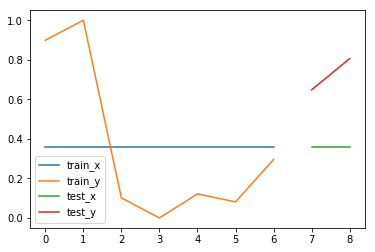

In [141]:

#예측을 그래프로 시각화
train_len = np.arange(len(X_train))
test_len = np.arange(len(X_train), len(X_train) + len(X_test))
plt.plot(train_len, lr.predict(X_train), label='train_x')
plt.plot(train_len, y_train, label='train_y')
plt.plot(test_len, lr.predict(X_test), label='test_x')
plt.plot(test_len, y_test, label='test_y')
plt.legend()

In [157]:
f = 'test.csv'
df = pd.read_csv(f, encoding = 'cp949', index_col=0, header=1)
df.shape

(494, 8)

In [158]:
## 데이터 정제()

In [171]:
df4 = df.iloc[:, :4]
df4 = df4.dropna() # NaN 하나라도 있으면 그 행을 버린다

In [175]:
# 전처리 ( 문자 > 숫자)

In [176]:
df4.info() # 데이터 형 확인

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2019.07.02 to 2018.06.29
Data columns (total 4 columns):
보내실때    248 non-null float64
받으실때    248 non-null float64
사실때     248 non-null float64
파실때     248 non-null float64
dtypes: float64(4)
memory usage: 9.7+ KB


In [177]:
df4 = df4.replace(',','',regex=True)
df4 = df4.astype(np.float)

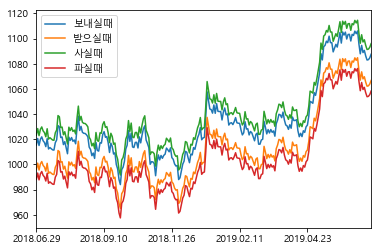

In [180]:
plt.rc('font', family = 'Malgun Gothic')
df4.iloc[::-1].plot()

In [305]:
f = '8.8.1.1 주요국통화의 대원화 환.xls'
df = pd.read_excel(f, encoding = 'cp949', index_col=0, header=3)
df.shape
df

,원자료,원자료.1
변환,,
2018/06/29,1121.7,1014.79
2018/06/30,NaN,NaN
2018/07/01,NaN,NaN
2018/07/02,1117.2,1009.26
2018/07/03,1117.4,1008.26
2018/07/04,1121.1,1014.34
2018/07/05,1115.3,1009.55
2018/07/06,1118.4,1010.85
2018/07/07,NaN,NaN


In [192]:
df.columns = ['미국달러', '일본엔']

In [199]:
df2 = df.dropna()

In [200]:
df.info()
# 데이터 형 확인

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 2018/06/29 to 2019/07/02
Data columns (total 2 columns):
미국달러    248 non-null float64
일본엔     248 non-null float64
dtypes: float64(2)
memory usage: 18.6+ KB


In [207]:
window_week = 4
window_day = window_week * 5 # 5 일
predict_day = 5
window_day

20

X, Y 갯수 체크

- 데이터가 30개 있으면? 20개로부터 5일 예측하므로 (20+5) = 1샘플, 총 5샘플
- 현재 데이터 248개 샘플, 총 223쌍의 X,Y를 만들어야 합니다.
- X[224, 2 * 20], y[224, 2 * 5 ]

In [231]:
len(df2), window_day+predict_day, len(df2) - (window_day+predict_day-1)

(248, 25, 224)

In [232]:
offset = window_day+predict_day-1
offset, len(df2)-offset

(24, 224)

In [230]:
before = df2.iloc[:-predict_day] # 최근 데이터 5개 빼고
later = df2.iloc[window_day:] # 과거 데이터 20개 빼고
before.shape, later.shape


((243, 2), (228, 2))

In [243]:
m = len(df2) - (predict_day + window_day - 1)
m, window_day, predict_day

(224, 20, 5)

In [251]:
x_list = []
y_list = []

for i in range(m):
    x = df2.iloc[i:i+window_day] #20일간의 데이터
    y = df2.iloc[i+window_day:i+window_day+predict_day] # 그 다음 5일간의 데이터
    x_list.append(x.values) # 날짜 인덱스 빼고 값만 저장
    y_list.append(y.values)

In [272]:
X = np.array(x_list)
y = np.array(y_list)
X.shape, y.shape #(m-인스턴스, day, 특징수(달러,엔화))

((224, 20, 2), (224, 5, 2))

In [273]:
X = np.reshape(X, [m, -1])
y = np.reshape(y, [m, -1])
X.shape, y.shape # (달러,엔화,달러,엔화....)

((224, 40), (224, 10))

In [274]:
offset = 30
X_train = X[offset:]
x_test = x[:offset]
y_train = y[offset:]
y_test = y[:offset]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 40), (30, 40), (194, 10), (30, 10))

In [307]:
# 모델선택, 학습
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = Lasso(alpha=1.0).fit(X_train, y_train)


array([[1123.1 , 1012.03, 1128.1 , ..., 1013.39, 1121.2 , 1000.94],
       [1128.1 , 1014.98, 1126.8 , ..., 1000.94, 1119.2 ,  999.42],
       [1126.8 , 1009.54, 1127.3 , ...,  999.42, 1126.2 , 1008.15],
       ...,
       [1162.  , 1082.19, 1157.9 , ..., 1075.  , 1156.8 , 1073.35],
       [1157.9 , 1078.97, 1154.7 , ..., 1073.35, 1156.4 , 1066.74],
       [1154.7 , 1077.35, 1158.2 , ..., 1066.74, 1155.4 , 1066.8 ]])

In [276]:
# 성능 측정
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9184648749535445, -0.4608138315986671)

In [297]:
# 그래프로 시각화
최근20일데이터 = df2.iloc[-window_day:].values.reshape([1,-1])
미래의5일예측 = lr.predict(최근20일데이터)
미래의5일예측 = np.reshape(미래의5일예측, [predict_day, 2]) # 다시 3차원으로 변환
미래의5일예측.shape

(5, 2)

In [298]:
X.shape

(224, 40)

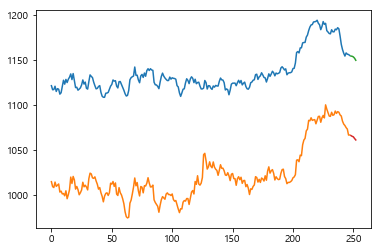

In [304]:
usa = df2.iloc[:,0].values
japan = df2.iloc[:,1].values
x_num = np.arange(len(usa))
x1_num = np.arange(len(usa),len(usa)+len(미래의5일예측))
plt.plot(x_num, usa)
plt.plot(x_num, japan)
plt.plot(x1_num, 미래의5일예측[:,0])
plt.plot(x1_num, 미래의5일예측[:,1])

자신이 관심있는 증권 종목 미래 가격 예측하기